In [3]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import io
from google.colab import files

if 'uploaded' not in locals():
  print("Silakan unggah file dataset...")
  uploaded = files.upload()
  print("\n✅ File berhasil diunggah!")
else:
  print("✅ File sudah ada. Melanjutkan proses.")

Silakan unggah file dataset...


Saving IMDB Dataset.csv to IMDB Dataset.csv

✅ File berhasil diunggah!


In [5]:
# Muat dataset utama
df_full = pd.read_csv(io.BytesIO(uploaded['IMDB Dataset.csv']))

# PROSES FILTER
# Kata kunci yang akan dicari adalah film buatan Christopher Nolan
keyword = "Christopher Nolan"
print(f"\nMemfilter review untuk film '{keyword}'...")

df_nolan = df_full[df_full['review'].str.contains(keyword, case=False, na=False)].copy()

# Pisahkan review Positif dan Negatif
positive_reviews = df_nolan[df_nolan['sentiment'] == 'positive']
negative_reviews = df_nolan[df_nolan['sentiment'] == 'negative']

print(f"\nFilter Selesai! Ditemukan:")
print(f"- {len(positive_reviews)} review positif tentang Nolan.")
print(f"- {len(negative_reviews)} review negatif tentang Nolan.")
print("-" * 30)

display(positive_reviews.head())
print("-" * 30)
display(negative_reviews.head())
print("-" * 30)

# Menyiapkan Teks untuk AI (IBM Granite)
positive_reviews_text = " ".join(positive_reviews['review'].head(25).tolist())
negative_reviews_text = " ".join(negative_reviews['review'].head(25).tolist())

print("Teks siap untuk dianalisis oleh AI.")


Memfilter review untuk film 'Christopher Nolan'...

Filter Selesai! Ditemukan:
- 24 review positif tentang Nolan.
- 4 review negatif tentang Nolan.
------------------------------


,review,sentiment
2806,And a perfect film to watch during the holiday...,positive
6679,Christopher Nolan had his goals set on Followi...,positive
12947,Given Christopher Nolan's string of successful...,positive
13219,Two dysfunctional brothers (Philip Seymour Hof...,positive
13338,I've enjoyed this movie ever since I was a kid...,positive


------------------------------


,review,sentiment
6024,I am a great fan of the Batman comics and I be...,negative
15639,I actually trawled through the entire set of r...,negative
38575,Set in 1976 for no apparent reason other than ...,negative
48711,"I`m in two minds about FOLLOWING , the film de...",negative


------------------------------
Teks siap untuk dianalisis oleh AI.


In [6]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata

print("--- Mengambil API Token dari Colab Secrets...")
try:
    api_token = userdata.get('api_token')
    os.environ["REPLICATE_API_TOKEN"] = api_token
    print("✅ API Token berhasil diambil!")
except Exception as e:
    print("🔴 GAGAL mengambil API Token. Pastikan Anda sudah menyimpannya di 'Secrets' dengan nama 'api_token'.")
    # Hentikan eksekusi jika token tidak ada
    exit()

--- Mengambil API Token dari Colab Secrets...
✅ API Token berhasil diambil!


In [7]:
print("--- Menyiapkan Model IBM Granite via Replicate...")
model = "ibm-granite/granite-3.3-8b-instruct"

llm = Replicate(
    model=model,
    replicate_api_token=api_token
)

print("✅ Model siap digunakan.")

--- Menyiapkan Model IBM Granite via Replicate...
✅ Model siap digunakan.


In [8]:
prompt_pujian = f"""
Instruction: You are a movie analyst. Summarize the main reasons from the following movie reviews.
Input: The following are positive reviews for films by director Christopher Nolan. Based on these reviews, summarize the 3 main reasons why audiences praise his work. Use bullet points.
Reviews: "{positive_reviews_text}"
Summary:
"""

prompt_kritik = f"""
Instruction: You are a movie analyst. Summarize the main reasons from the following movie reviews.
Input: The following are negative reviews for films by director Christopher Nolan. Based on these reviews, summarize the 3 main reasons why some audiences criticize his work. Use bullet points.
Reviews: "{negative_reviews_text}"
Summary:
"""

# Memanggil Model dan Menampilkan Hasil
print("--- Memanggil AI untuk menganalisis review POSITIF...")
hasil_pujian = llm.invoke(prompt_pujian)
print("\n✅ HASIL ANALISIS PUJIAN:")
print(hasil_pujian)


print("\n--- Memanggil AI untuk menganalisis review NEGATIF...")
hasil_kritik = llm.invoke(prompt_kritik)
print("\n✅ HASIL ANALISIS KRITIK:")
print(hasil_kritik)

--- Memanggil AI untuk menganalisis review POSITIF...

✅ HASIL ANALISIS PUJIAN:
Based on the provided positive movie reviews, here are the three main reasons why audiences praise Christopher Nolan's work:

1. **Unique Storytelling and Non-linear Narratives**: Nolan is highly regarded for his innovative approach to storytelling, often employing non-linear narratives that require the audience's active engagement to piece together the plot. This technique is praised for its intelligence and originality, as seen in films like "Memento" and "Following."

2. **Atmospheric and Visually Striking Films**: Critics appreciate Nolan's ability to create immersive and atmospheric worlds, often utilizing dark, Gothic aesthetics. His films, such as "Batman Returns" and his Batman trilogy, are noted for their visual style, moody cinematography, and meticulous production design.

3. **Compelling Characters and Performances**: Nolan's films are lauded for their complex characters and the strong performan

/tmp/ipython-input-9-2604832301.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#4CAF50', '#F44336'])


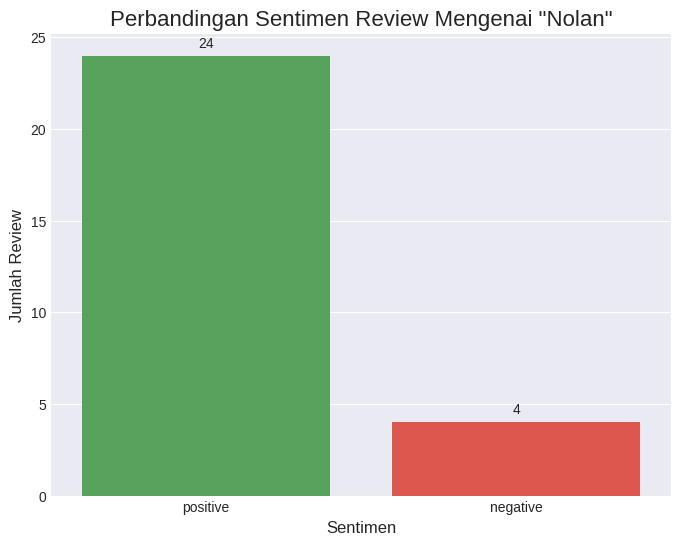

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah masing-masing sentimen
sentiment_counts = df_nolan['sentiment'].value_counts()

# Mengatur style dan warna plot
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(8, 6))

# Membuat bar plot
barplot = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#4CAF50', '#F44336'])

# Menambahkan judul dan label
plt.title('Perbandingan Sentimen Review Mengenai "Nolan"', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Review', fontsize=12)

# Menambahkan angka di atas setiap batang
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

# Tampilkan plot
plt.show()